# Libraries Importing :

In [38]:
import os
import shutil
from pathlib import Path
#***************************************
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
#***************************************

from ipywidgets import interact, Dropdown
import ipywidgets as widgets
import numpy as np
#**************************************
from scipy.signal import butter, filtfilt, savgol_filter
import pywt 
#**************************************
import scipy.io as sio
from scipy.signal import welch
#**************************************
import scipy.io
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
#**************************************
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
#**************************************
import warnings
import mne
import tensorflow as tf

# Data Organization Preview :

In [159]:
def organize_mat_files(source_folder="Data/raw_data", target_folder="organized_data"):
    """
    Organizes .mat files from source folder into organized structure:
    - calm/ folder: files starting with "Relax_sub"
    - stress/ folder: files starting with "Stroop_sub", "Arithmetic_sub", "Mirror_image_sub"
    """
    
    # Define source and target paths
    source_path = Path(source_folder)
    target_path = Path(target_folder)
    
    # Check if source folder exists
    if not source_path.exists():
        print(f"Error: Source folder '{source_folder}' does not exist!")
        return
    
    # Create target folder structure
    calm_folder = target_path / "calm"
    stress_folder = target_path / "stress"
    
    # Create directories if they don't exist
    calm_folder.mkdir(parents=True, exist_ok=True)
    stress_folder.mkdir(parents=True, exist_ok=True)
    
    # Define file prefixes for categorization
    calm_prefixes = ["Relax_sub"]
    stress_prefixes = ["Stroop_sub", "Arithmetic_sub", "Mirror_image_sub"]
    
    # Get all .mat files from source folder
    mat_files = list(source_path.glob("*.mat"))
    
    if not mat_files:
        print(f"No .mat files found in '{source_folder}'")
        return
    
    print(f"Found {len(mat_files)} .mat files to organize...")
    
    # Counters for tracking
    calm_count = 0
    stress_count = 0
    unmatched_count = 0
    
    # Process each .mat file
    for mat_file in mat_files:
        filename = mat_file.name
        moved = False
        
        # Check if file belongs to calm category
        for prefix in calm_prefixes:
            if filename.startswith(prefix):
                destination = calm_folder / filename
                shutil.copy2(mat_file, destination)
                print(f"Moved {filename} to calm/")
                calm_count += 1
                moved = True
                break
        
        # Check if file belongs to stress category (only if not already moved)
        if not moved:
            for prefix in stress_prefixes:
                if filename.startswith(prefix):
                    destination = stress_folder / filename
                    shutil.copy2(mat_file, destination)
                    print(f"Moved {filename} to stress/")
                    stress_count += 1
                    moved = True
                    break
        
        # Track unmatched files
        if not moved:
            print(f"Warning: File '{filename}' doesn't match any expected prefix")
            unmatched_count += 1
    
    # Print summary
    print(f"\nOrganization complete!")
    print(f"Calm files: {calm_count}")
    print(f"Stress files: {stress_count}")
    print(f"Unmatched files: {unmatched_count}")
    print(f"Total processed: {len(mat_files)}")
    print(f"\nFiles organized in: {target_path.absolute()}")


In [2]:

def preview_organization(source_folder="raw_data"):
    """
    Preview what files would be moved 
    """
    source_path = Path(source_folder)
    
    if not source_path.exists():
        print(f"Error: Source folder '{source_folder}' does not exist!")
        return
    
    # Define file prefixes for categorization
    calm_prefixes = ["Relax_sub"]
    stress_prefixes = ["Stroop_sub", "Arithmetic_sub", "Mirror_image_sub"]
    
    # Get all .mat files from source folder
    mat_files = list(source_path.glob("*.mat"))
    
    if not mat_files:
        print(f"No .mat files found in '{source_folder}'")
        return
    
    print(f"Preview of organization for {len(mat_files)} .mat files:\n")
    
    calm_files = []
    stress_files = []
    unmatched_files = []
    
    for mat_file in mat_files:
        filename = mat_file.name
        categorized = False
        
        # Check calm category
        for prefix in calm_prefixes:
            if filename.startswith(prefix):
                calm_files.append(filename)
                categorized = True
                break
        
        # Check stress category
        if not categorized:
            for prefix in stress_prefixes:
                if filename.startswith(prefix):
                    stress_files.append(filename)
                    categorized = True
                    break
        
        # Track unmatched
        if not categorized:
            unmatched_files.append(filename)
    
    print("CALM folder will contain:")
    for file in sorted(calm_files):
        print(f"  - {file}")
    
    print(f"\nSTRESS folder will contain:")
    for file in sorted(stress_files):
        print(f"  - {file}")
    
    if unmatched_files:
        print(f"\nUNMATCHED files (won't be moved):")
        for file in sorted(unmatched_files):
            print(f"  - {file}")
    
    print(f"\nSummary:")
    print(f"Calm: {len(calm_files)} files")
    print(f"Stress: {len(stress_files)} files")
    print(f"Unmatched: {len(unmatched_files)} files")

if __name__ == "__main__":
    # First, preview the organization
    print("=== PREVIEW MODE ===")
    preview_organization()
    
    # Ask user confirmation
    response = input("\nDo you want to proceed with the organization? (y/n): ")
    
    if response.lower() in ['y', 'yes']:
        print("\n=== ORGANIZING FILES ===")
        organize_mat_files()
    else:
        print("Organization cancelled.")

=== PREVIEW MODE ===
No .mat files found in 'raw_data'



Do you want to proceed with the organization? (y/n):  y



=== ORGANIZING FILES ===
Found 480 .mat files to organize...
Moved Arithmetic_sub_10_trial1.mat to stress/
Moved Arithmetic_sub_10_trial2.mat to stress/
Moved Arithmetic_sub_10_trial3.mat to stress/
Moved Arithmetic_sub_11_trial1.mat to stress/
Moved Arithmetic_sub_11_trial2.mat to stress/
Moved Arithmetic_sub_11_trial3.mat to stress/
Moved Arithmetic_sub_12_trial1.mat to stress/
Moved Arithmetic_sub_12_trial2.mat to stress/
Moved Arithmetic_sub_12_trial3.mat to stress/
Moved Arithmetic_sub_13_trial1.mat to stress/
Moved Arithmetic_sub_13_trial2.mat to stress/
Moved Arithmetic_sub_13_trial3.mat to stress/
Moved Arithmetic_sub_14_trial1.mat to stress/
Moved Arithmetic_sub_14_trial2.mat to stress/
Moved Arithmetic_sub_14_trial3.mat to stress/
Moved Arithmetic_sub_15_trial1.mat to stress/
Moved Arithmetic_sub_15_trial2.mat to stress/
Moved Arithmetic_sub_15_trial3.mat to stress/
Moved Arithmetic_sub_16_trial1.mat to stress/
Moved Arithmetic_sub_16_trial2.mat to stress/
Moved Arithmetic_s

# Data Discovery :

+ **Mat files structure level:**

In [3]:
mat_data = scipy.io.loadmat('./organized_data/calm/Relax_sub_1_trial1.mat')

# Show all top-level keys in the MAT file
print(mat_data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'Data'])


+ **Data Conversion to DataFrame:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 3200 entries, 0 to 3199
dtypes: float64(3200)
memory usage: 800.1 KB


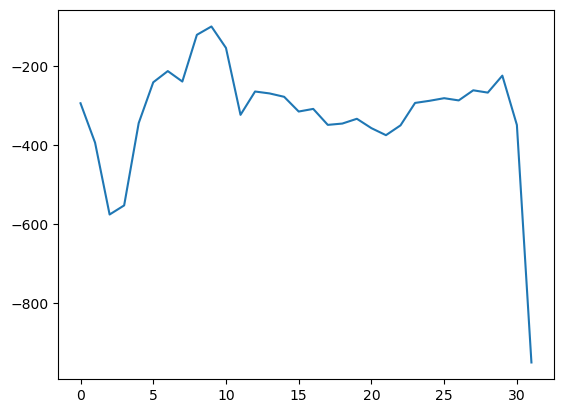

In [4]:
# Convert data to pandas DataFrame
df = pd.DataFrame(mat_data['Data'])
df.info()
df.head()


# Plot first column of DataFrame
plt.plot(df.iloc[:,0])
plt.show()

+ **Data Overview:**

In [5]:
df

0           1            2           3           4           5     \
0  -293.665598 -298.399875  -301.943789 -285.972535 -257.707257 -245.080964   
1  -393.401573 -400.048753  -407.845605 -377.387265 -344.456374 -342.355437   
2  -575.448727 -585.573202  -595.233775 -573.882757 -551.952952 -559.158816   
3  -552.385245 -562.898707  -567.927282 -554.185721 -539.960243 -547.075632   
4  -343.861665 -351.568356  -349.943338 -338.059141 -321.224793 -317.859000   
5  -240.575451 -243.086700  -240.779735 -222.110522 -198.088066 -191.932568   
6  -212.163418 -213.693102  -215.572546 -200.207311 -177.041076 -172.399639   
7  -238.633139 -240.429100  -237.671039 -227.684893 -215.366742 -213.189967   
8  -120.328131 -124.218438  -117.170749 -104.904568  -88.303354  -72.977555   
9   -99.181315 -104.190581   -96.782342  -84.009598  -68.131881  -51.464981   
10 -153.503229 -159.716988  -159.835376 -144.013567 -124.577505 -111.528140   
11 -322.996122 -327.298538  -330.630576 -318.912085 -306.400245 -303.810420   
12 -263.899055 -275.301125  -273.971936 -260.626808 -248.231804 -239.084057   
13 -268.781275 -289.853762  -292.593845 -271.633290 -259.402937 -255.542741   
14 -277.318931 -298.265783  -301.465852 -277.085922 -264.425622 -261.043435   
15 -314.620698 -324.186282  -328.165491 -310.316402 -294.388009 -288.311866   
16 -307.951867 -312.766980  -309.058353 -296.571014 -280.978381 -269.089988   
17 -348.419083 -359.151141  -360.914414 -340.500303 -321.599626 -315.510916   
18 -345.079325 -362.123427  -364.088646 -336.821083 -318.963340 -316.141391   
19 -332.967569 -350.697104  -354.927900 -328.869777 -308.355983 -303.993079   
20 -356.751505 -369.334179  -370.604227 -351.439265 -330.346674 -324.102839   
21 -374.497494 -382.451660  -382.976724 -366.565826 -345.560587 -337.867064   
22 -349.634937 -356.882097  -355.676249 -339.951335 -319.689945 -310.558555   
23 -292.825391 -302.149321  -302.652226 -283.877219 -261.388478 -249.344007   
24 -287.392312 -303.996441  -312.870072 -287.424846 -259.092244 -256.725376   
25 -280.841417 -304.624400  -319.762199 -286.742556 -252.789884 -253.605627   
26 -286.448680 -309.582008  -321.523901 -291.693446 -264.366548 -265.214627   
27 -260.862152 -274.418955  -279.077326 -255.920049 -231.102638 -221.240154   
28 -266.688030 -276.067366  -280.387428 -259.248795 -232.788673 -223.495355   
29 -223.701399 -240.164287  -253.346596 -229.922294 -203.769612 -201.223861   
30 -348.595826 -377.595147  -398.324640 -371.022823 -354.462897 -367.282054   
31 -950.235710 -981.268160 -1005.492402 -972.021234 -942.052626 -959.846372   

          6           7           8           9     ...        3190  \
0  -260.300258 -268.258852 -252.050509 -243.118493  ...   46.957061   
1  -347.780203 -342.221520 -333.916586 -324.756343  ... -146.696577   
2  -574.027434 -578.708201 -580.339735 -578.398125  ... -262.400291   
3  -565.205830 -574.301259 -575.629817 -576.137348  ... -210.281891   
4  -335.325532 -347.344128 -342.532393 -338.808624  ...    2.785030   
5  -201.664772 -201.711944 -191.088427 -184.193430  ...    0.587936   
6  -180.541262 -178.487148 -172.731817 -168.226435  ...   -6.732053   
7  -214.689348 -211.957039 -210.544819 -204.757437  ...   -5.403608   
8   -85.463437 -100.351997  -86.873100  -67.230701  ...   -5.480380   
9   -68.583139  -86.957635  -66.202722  -42.833831  ...   -7.188764   
10 -125.453838 -137.711596 -118.033013  -97.408027  ...   -6.850677   
11 -307.063479 -307.166276 -297.052074 -286.947983  ...   -2.035603   
12 -245.226857 -255.886477 -242.456958 -224.752129  ...    0.331799   
13 -259.429575 -269.577315 -258.388254 -235.939630  ...   -2.190613   
14 -266.871541 -281.271306 -269.997377 -240.130632  ...   -0.932761   
15 -295.986277 -307.385544 -298.032266 -277.783514  ...    1.105025   
16 -277.090997 -289.080015 -278.134937 -262.399753  ...    2.811307   
17 -320.625860 -327.170148 -317.416519 -302.139723  ...    0.407423   
18 -321.899748 -329.906504 -319.257261 -300.260733  .

+ **EEG Channels Visualization**

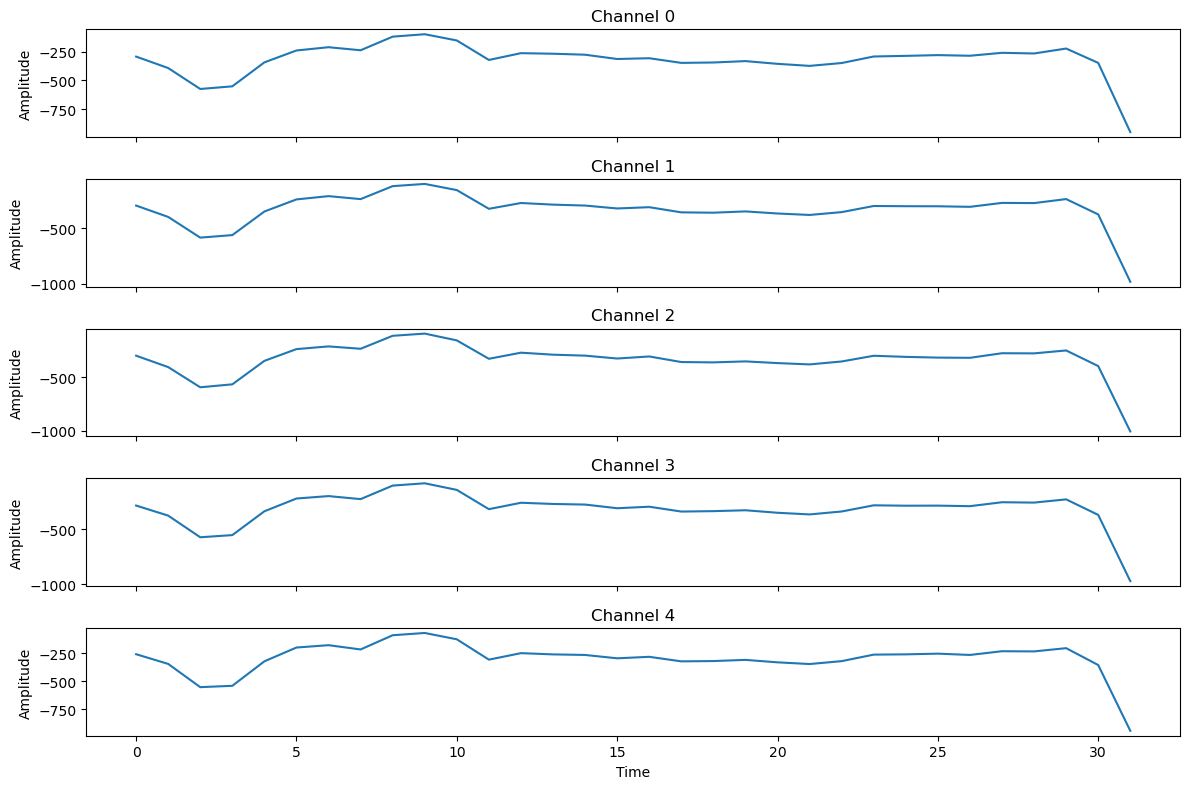

In [6]:
channels_to_plot = 5 
fig, axes = plt.subplots(channels_to_plot, 1, figsize=(12, 8), sharex=True)

for i in range(channels_to_plot):
    axes[i].plot(df.iloc[:, i])
    axes[i].set_title(f"Channel {i}")
    axes[i].set_ylabel("Amplitude")

plt.xlabel("Time")
plt.tight_layout()
plt.show()

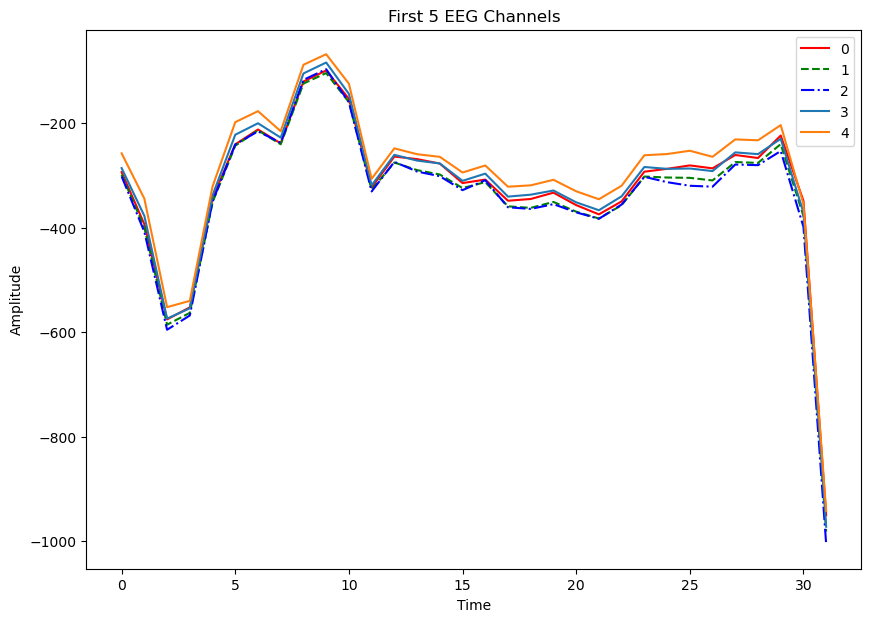

In [7]:
df.iloc[:, :5].plot(figsize=(10, 7), style=['r-', 'g--', 'b-.'])
plt.title("First 5 EEG Channels")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

+ **Interactive visualization to 4 categories of tests:**

In [8]:
# File mapping (dropdown label -> file path)
file_paths = {
    'Relax': './organized_data/calm/Relax_sub_1_trial1.mat',
    'Stroop': './organized_data/stress/Stroop_sub_1_trial1.mat',
    'Mirror Image': './organized_data/stress/Mirror_image_sub_1_trial1.mat',
    'Arithmetic': './organized_data/stress/Arithmetic_sub_1_trial1.mat'
}

# Define the plotting function
def plot_eeg(file_label):
    file_path = file_paths[file_label]

    # Load and transpose EEG data
    mat_data = scipy.io.loadmat(file_path)
    if 'Data' not in mat_data:
        print(f"Key 'Data' not found in {file_label}")
        return
    df = pd.DataFrame(mat_data['Data']).T

    # Generate timestamps assuming 256 Hz sampling rate
    time_stamps = pd.date_range(start='1/1/2000', periods=df.shape[0], freq='4ms')

    num_channels = df.shape[1]
    fig_height = num_channels * 1.5  # Dynamically scale height

    fig, axes = plt.subplots(nrows=num_channels, ncols=1, figsize=(18, fig_height), sharex=True, constrained_layout=True)

    for i in range(num_channels):
        axes[i].plot(time_stamps, df.iloc[:, i], linewidth=0.8)
        axes[i].set_ylabel(f'Ch {i+1}', fontsize=8)
        axes[i].tick_params(axis='y', labelsize=7)

    axes[-1].set_xlabel('Time', fontsize=10)
    fig.suptitle(f'{file_label} - EEG Signals (All 32 Channels)', fontsize=14, y=1.02)
    plt.show()

# Create the dropdown widget
dropdown = Dropdown(
    options=file_paths.keys(),
    value='Relax',
    description='Select EEG File:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Display interactive widget
interact(plot_eeg, file_label=dropdown)



interactive(children=(Dropdown(description='Select EEG File:', layout=Layout(width='50%'), options=('Relax', '…

<function __main__.plot_eeg(file_label)>

+ **Numbers of channels & channels length shape**:

In [9]:
# load one file from calm folder
calm_file = './organized_data/calm/Relax_sub_1_trial1.mat'
calm_data = scipy.io.loadmat(calm_file)
print('Calm data shape:', calm_data['Data'].shape)

# load one file from stress folder
stress_file = './organized_data/stress/Stroop_sub_1_trial1.mat'
stress_data = scipy.io.loadmat(stress_file)
print('Stress data shape:', stress_data['Data'].shape)

Calm data shape: (32, 3200)
Stress data shape: (32, 3200)


# Preprocessing Process :

# PHASE 1: PREPROCESSING

## Step 0: Band-pass Filter

• **Purpose**: Remove unwanted frequencies outside 0.5-45 Hz range

• **Function**: `bandpass_filter(data, lowcut=0.5, highcut=45.0, fs=250.0, order=5)`

• **How it works**:
  - Low cut and highcut
  - frequency per sample 250(250 échantillons par seconde)
  - 5 as Speed (à quelle vitesse il coupe les fréquences indésirables)
  - Apply zero-phase :iltering to avoid phase distortion(Different frequencies in the signal get delayed by different amounts.)

• **Remember**: This removes drift (below 0.5 Hz) and high-frequency noise (above 45 Hz)

## Step 1: Baseline Correction

• **Purpose**: Remove slow drifts and trends in the signal

• **Method**: Savitzky-Golay filter with window=127, polynomial order=5

• **Process**:
  - Estimate the baseline trend using `savgol_filter()`
  - Subtract estimated trend from original signal
  - Result: Signal centered around zero baseline

• **Remember**: This removes gradual shifts that can affect analysis

## Step 2: Artifact Removal

• **Purpose**: Remove eye blinks, muscle artifacts, and electrical noise

• **Method**: Wavelet thresholding using Daubechies 2 wavelet

• **Process**:
  - Decompose signal into 4 levels using `pywt.wavedec()`
  - Apply soft thresholding to all coefficients
  - Reconstruct clean signal using `pywt.waverec()`

• **Note**: Keeps important brain signals while removing artifacts

## Step 3: Channel-wise Processing

• **Process**: Apply Steps 1-2 to each EEG channel independently

• **Output**: Clean EEG data ready for feature extraction

+ **Preprocessing steps:**

In [23]:
# --- Step 0: Band-pass filter ---
def bandpass_filter(data, lowcut=0.5, highcut=45.0, fs=250.0, order=5):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')
    return filtfilt(b, a, data)

def preprocess_data(data):
    """
    Apply baseline correction using Savitzky-Golay filter and artifact removal using wavelet thresholding.
    
    Parameters:
        data (numpy.ndarray): 2D array of shape (channels, samples)
        
    Returns:
        clean_data (numpy.ndarray): Preprocessed EEG data
    """

    def remove_baseline_drift(channel_data):
        # Apply Savitzky-Golay filter to estimate trend and subtract it
        trend = savgol_filter(channel_data, window_length=127, polyorder=5)
        
        return channel_data - trend

    def wavelet_thresholding(signal, wavelet='db2', level=4):
        # Decompose the signal
        coeffs = pywt.wavedec(signal, wavelet, level=level)
        approx, *details = coeffs

        # Compute threshold from one of the detail coefficients
        t = 0.8 * np.std(details[2])  # Similar to cd3 in MATLAB

        # Apply thresholding to all details and approximation
        def soft_threshold(c, t):
            return np.sign(c) * np.minimum(np.abs(c), t)

        approx = soft_threshold(approx, t)
        details = [soft_threshold(d, t) for d in details]

        # Reconstruct the signal
        return pywt.waverec([approx] + details, wavelet)

    channels, samples = data.shape
    clean_data = np.zeros_like(data)

    for i in range(channels):
        # Step 1: Remove baseline trend
        detrended = remove_baseline_drift(data[i])

        # Step 2: Remove artifacts via wavelet thresholding
        cleaned = wavelet_thresholding(detrended)

        # Store cleaned signal
        # Handle potential padding during reconstruction
        clean_data[i, :len(cleaned)] = cleaned[:samples]

    return clean_data


+ **Visualization before after preprocessing:**

In [24]:
def plot_eeg_comparison(raw_data, cleaned_data, channel_idx=0, fs=250.0, trial_label=""):
    time = np.arange(raw_data.shape[1]) / fs
    plt.figure(figsize=(14, 5))
    
    plt.plot(time, raw_data[channel_idx], label="Raw EEG", alpha=0.6)
    plt.plot(time, cleaned_data[channel_idx], label="Cleaned EEG", alpha=0.8)
    
    plt.title(f"EEG Before and After Artifact Removal (Channel {channel_idx}) {trial_label}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (µV)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [25]:

def plot_raw_and_cleaned_stacked(raw_data, cleaned_data, fs=250.0, file_label="EEG Comparison"):
    """
    Plots raw and cleaned EEG signals in two separate vertical stack plots (one per channel).
    
    Parameters:
        raw_data (ndarray): Raw EEG data (channels x samples)
        cleaned_data (ndarray): Cleaned EEG data (channels x samples)
        fs (float): Sampling frequency
        file_label (str): Title label for plots
    """
    num_channels, num_samples = raw_data.shape
    time_stamps = np.arange(num_samples) / fs
    fig_height = num_channels * 0.8  # Adjust for better spacing

    # --- Plot Raw EEG ---
    fig_raw, axes_raw = plt.subplots(nrows=num_channels, ncols=1, figsize=(20, fig_height), 
                                     sharex=True, constrained_layout=True)

    for i in range(num_channels):
        axes_raw[i].plot(time_stamps, raw_data[i], color='tab:blue', linewidth=0.9)
        axes_raw[i].set_ylabel(f'Ch {i+1}', fontsize=9)
        axes_raw[i].tick_params(axis='y', labelsize=8)
    axes_raw[-1].set_xlabel('Time (s)', fontsize=10)
    fig_raw.suptitle(f'{file_label} – Raw EEG (All {num_channels} Channels)', fontsize=16, y=1.01)
    plt.show()

    # --- Plot Cleaned EEG ---
    fig_cleaned, axes_cleaned = plt.subplots(nrows=num_channels, ncols=1, figsize=(20, fig_height), 
                                             sharex=True, constrained_layout=True)

    for i in range(num_channels):
        axes_cleaned[i].plot(time_stamps, cleaned_data[i], color='tab:red', linewidth=0.9)
        axes_cleaned[i].set_ylabel(f'Ch {i+1}', fontsize=9)
        axes_cleaned[i].tick_params(axis='y', labelsize=8)
    axes_cleaned[-1].set_xlabel('Time (s)', fontsize=10)
    fig_cleaned.suptitle(f'{file_label} – Cleaned EEG (All {num_channels} Channels)', fontsize=16, y=1.01)
    plt.show()


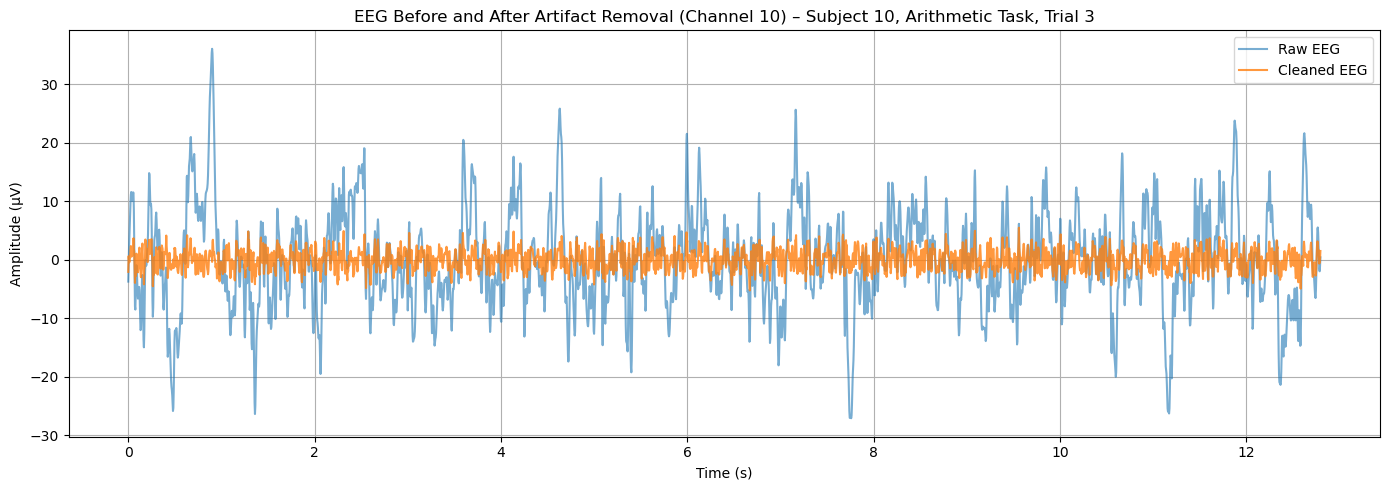

In [64]:
# Load corrupted EEG data from MATLAB file
mat = sio.loadmat('./Corrupted_EEG.mat')
data = mat['Data']  # Shape: (32, 3200)

# Apply preprocessing
if data.shape != (32, 3200):
    data =data.reshape(32, 3200)
data =  bandpass_filter(data)
cleaned = preprocess_data(data)

# Save cleaned data
sio.savemat('./organized_data/Cleaned_EEG.mat', {'Clean_data': cleaned})

# Visualize a channel (e.g., channel 10)
plot_eeg_comparison(data,cleaned, channel_idx=10, trial_label="– Subject 10, Arithmetic Task, Trial 3")


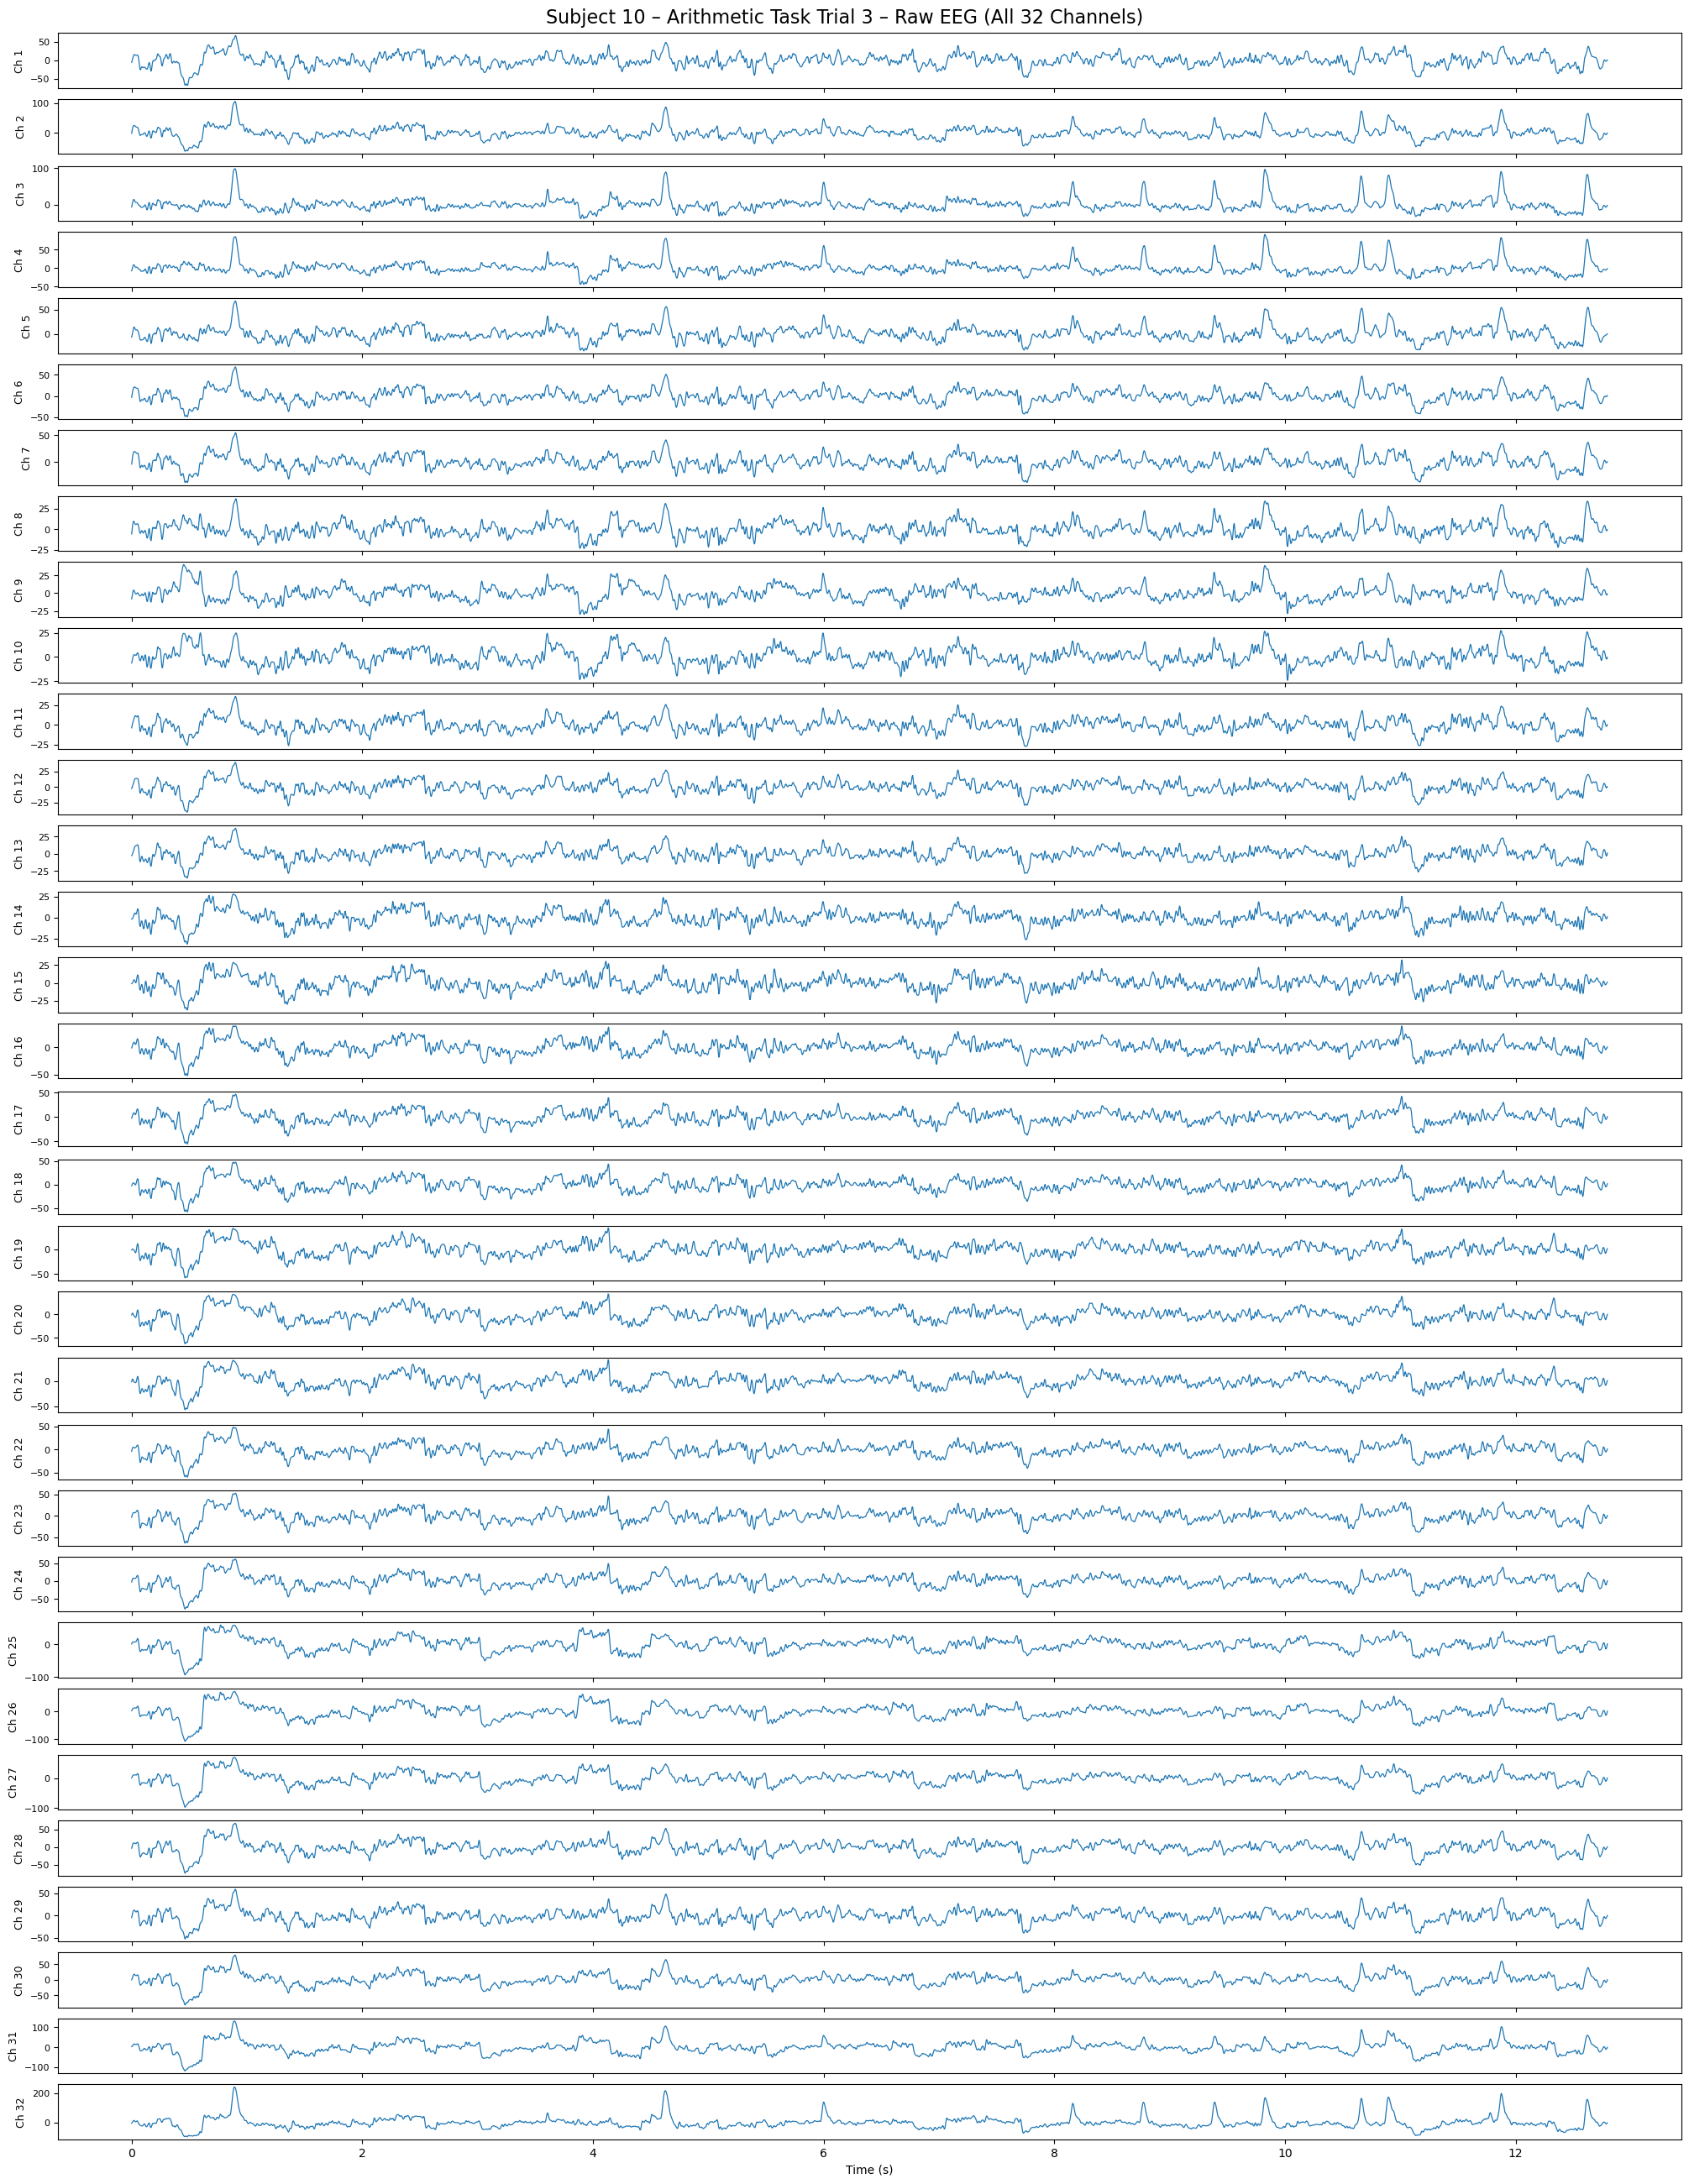

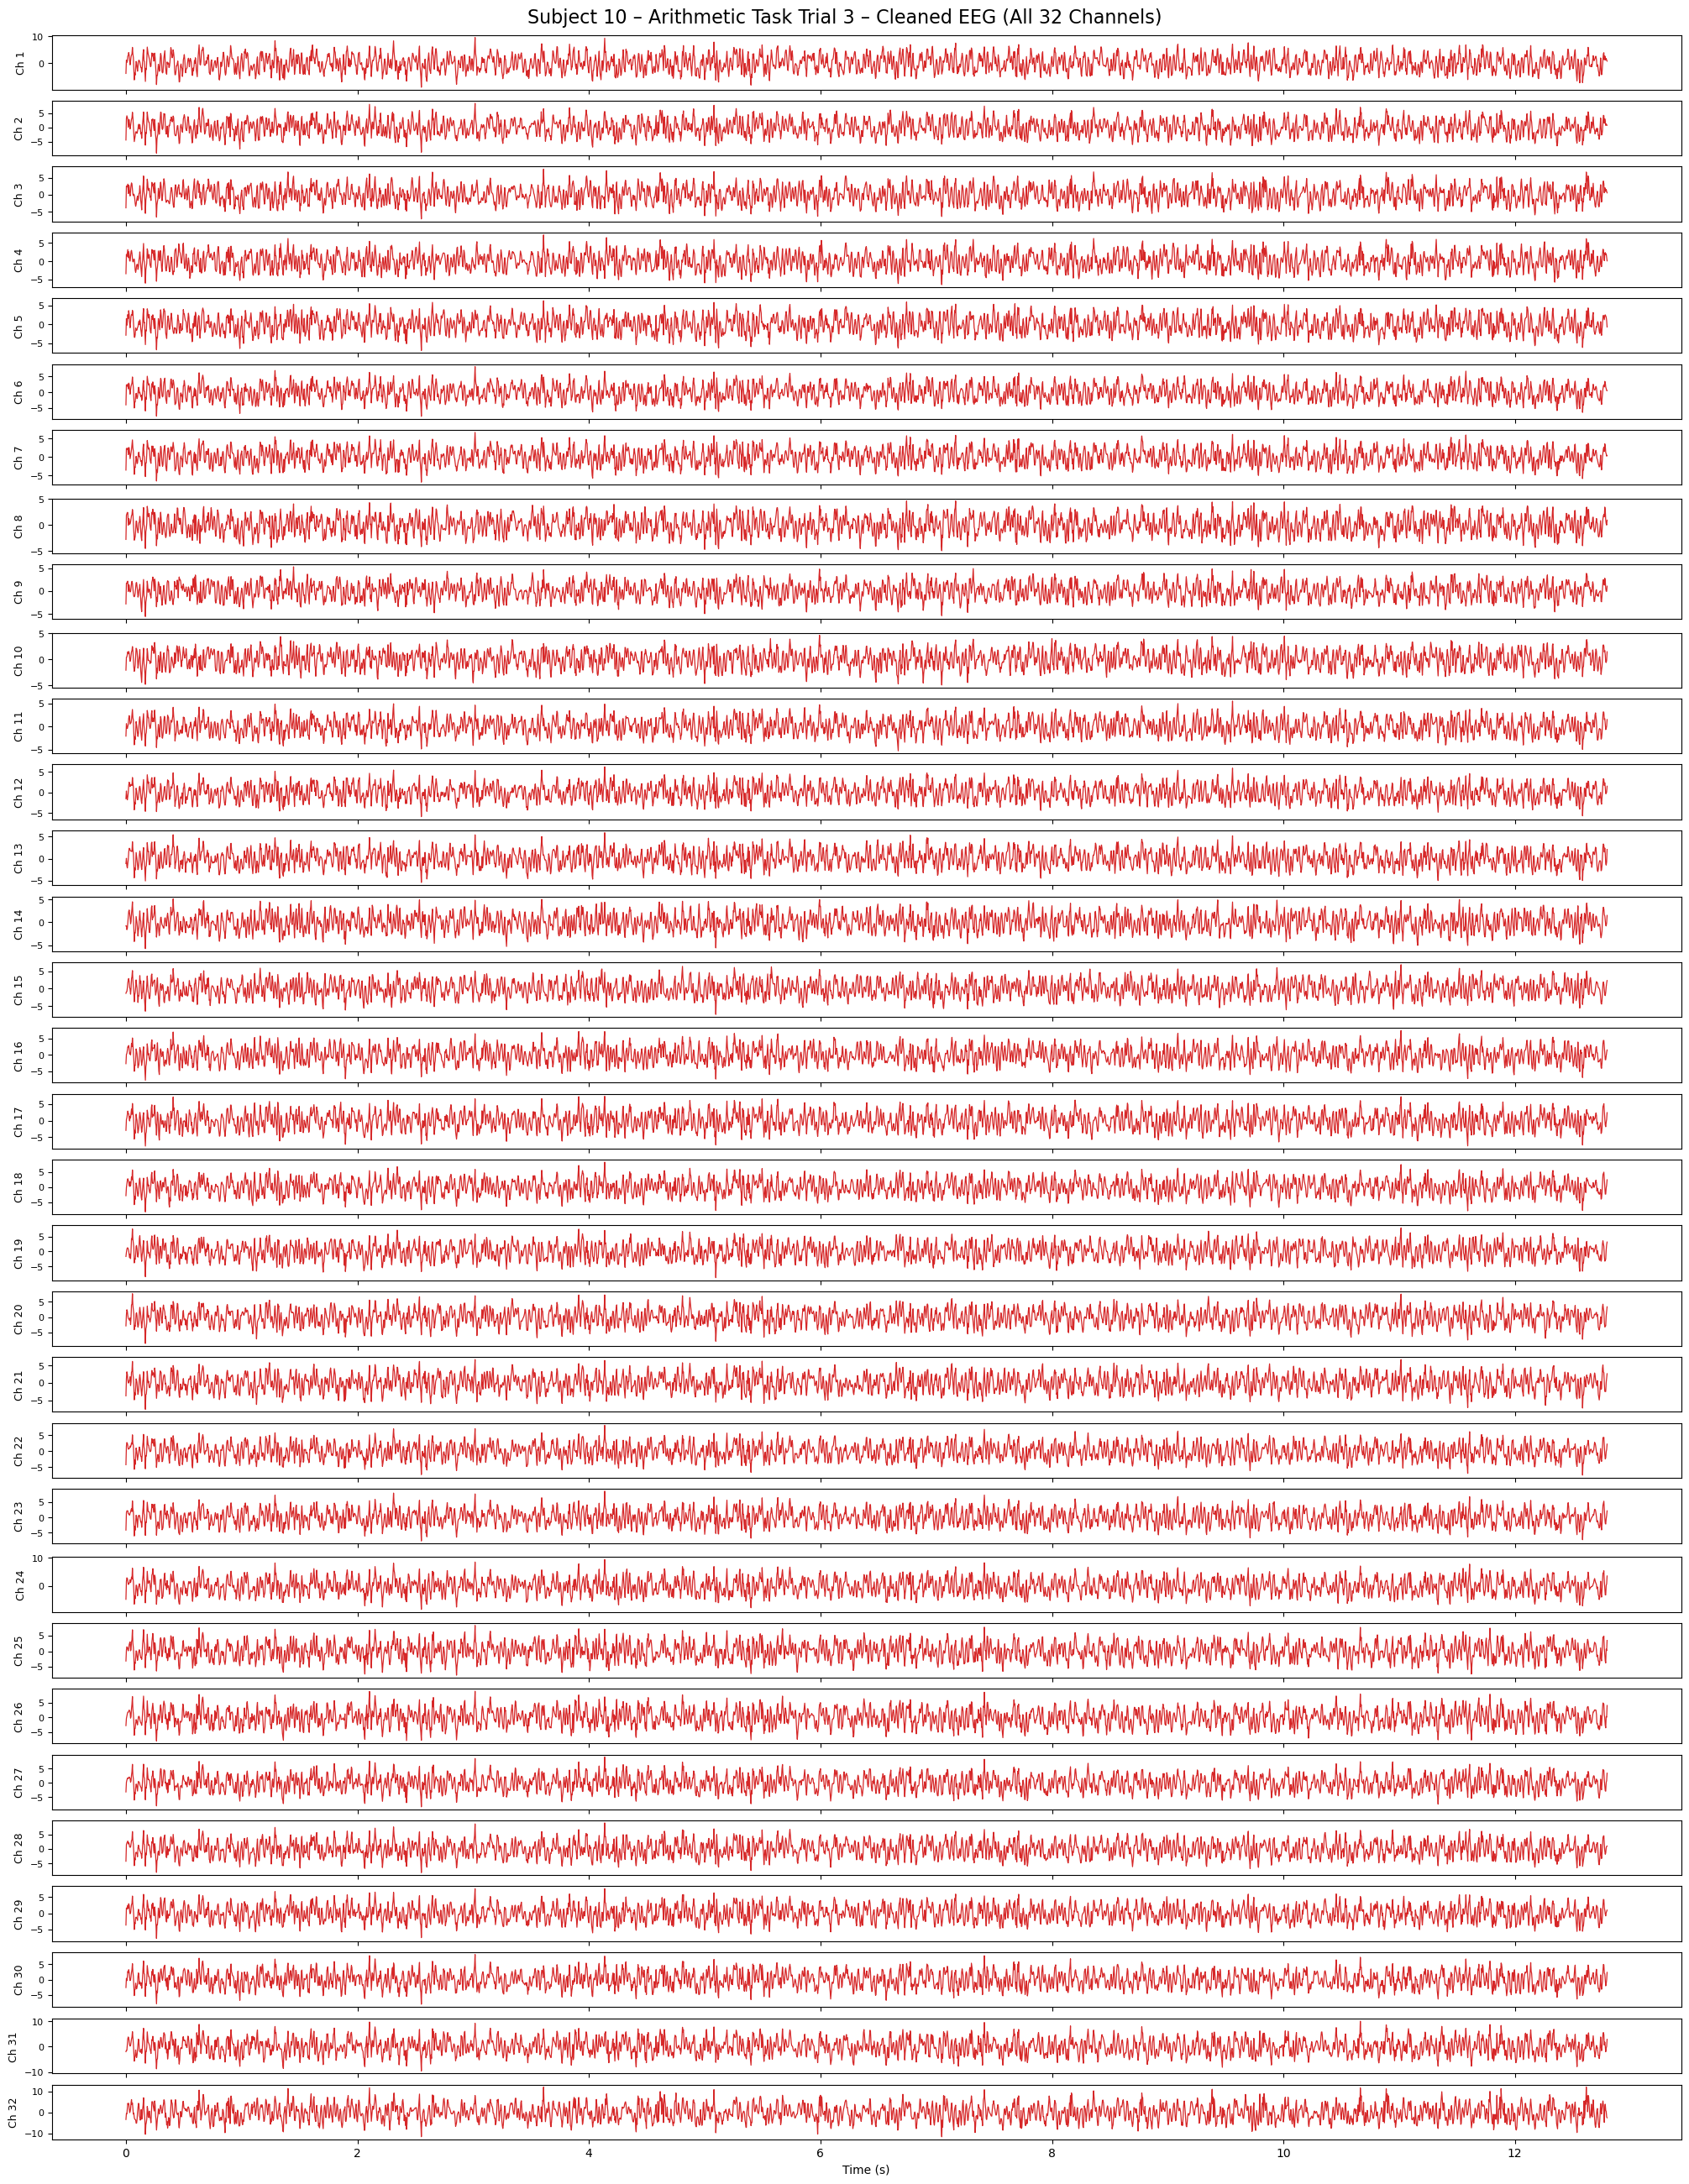

In [27]:
plot_raw_and_cleaned_stacked(raw_data=data, cleaned_data=cleaned, fs=250.0, 
                             file_label="Subject 10 – Arithmetic Task Trial 3")

# Feature Extraction Process : 

## PHASE 2: FEATURE EXTRACTION

### Step 1: Define Frequency Bands
• **Delta**: 0.5-4 Hz (deep sleep, unconscious processes)

• **Theta**: 4-8 Hz (drowsiness, meditation, memory)

• **Alpha**: 8-13 Hz (relaxed awareness, eyes closed)

• **Beta**: 13-30 Hz (active thinking, concentration)

• **Gamma**: 30-45 Hz (high-level cognitive processing)


### Step 2: Band Power Calculation
• **Function**: `bandpower(data, fs, band, window_sec=2)`

• **Method**: Welch's method for power spectral density

• **Process**:

  - Divide signal into 2-second overlapping windows
  - For each window use FFT to get frequency spectrum
  - Average across windows = Average all FFT results
  - Power Spectrum Calculation : psd = Power Spectral Density (result of FFT processing)
  - Calculate relative power (band power / total power)
    
### Step 3: Feature Matrix Creation
• **Process**: For each channel, extract power in all 5 frequency bands

• **Result**: Matrix of shape (channels × 5 bands)

• **Example**: For 32 channels → 32×5 = 160 raw features

### Step 4: Feature Aggregation
• **Purpose**: Reduce dimensionality while preserving information

• **Method**: Average the 5 band powers per channel

• **Process**:
  - Take mean across the 5 frequency bands for each channel
  - Reshape to (1, num_channels) format
    
• **Final output**: 1×32 feature vector (one aggregated feature per channel)

---





+ **Extract Features based on bands:**

In [66]:

def bandpower(data, fs, band, window_sec=2):
    """
    Compute the relative power of the signal in a frequency band using Welch’s method.
    """
    low, high = band
    nperseg = int(window_sec * fs)
    freqs, psd = welch(data, fs, nperseg=nperseg)
    
    # Find frequencies within the target band (e.g., Alpha 8-13 Hz)
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    # Calculate power in the specific frequency band
    band_power = np.trapz(psd[idx_band], freqs[idx_band])
    # Calculate total power across entire frequency spectrum
    total_power = np.trapz(psd, freqs)
    # Calculate relative power as percentage of total
    relative_power = band_power / total_power
    return relative_power

def apply_feature_extraction(data, fs=250.0):
    """
    Extracts relative bandpower features and returns one aggregated feature per channel.
    
    Parameters:
        data (ndarray): EEG data (channels x samples)
        fs (float): Sampling frequency
    
    Returns:
        features (ndarray): shape (1, 32) — one aggregated feature per channel
    """
    bands = {
        'delta': (0.5, 4),
        'theta': (4, 8),
        'alpha': (8, 13),
        'beta': (13, 30),
        'gamma': (30, 45)
    }

    num_channels = data.shape[0]
    feature_matrix = np.zeros((num_channels, len(bands)))

    for ch in range(num_channels):
        signal = data[ch]
        for i, band_range in enumerate(bands.values()):
            feature_matrix[ch, i] = bandpower(signal, fs, band_range)
    
    # Aggregate the 5 bands per channel by mean (or median, sum, etc.)
    aggregated_features = feature_matrix.mean(axis=1).reshape(1, -1)  # shape (1, 32)

    return aggregated_features


+ **Single channel feature extraction:**

In [29]:
# En example of Feature extraction for a single channel in the recording 
features = apply_feature_extraction(cleaned, fs=250.0)

print("Feature matrix shape:", features.shape)
print("Features for channel 1:", features[0])

Feature matrix shape: (1, 32)
Features for channel 1: [0.17971963 0.17854729 0.17785609 0.17722075 0.17813575 0.17874619
 0.17860087 0.17676936 0.17791023 0.17903818 0.18014106 0.17886654
 0.17918463 0.18101255 0.18321694 0.18190683 0.1809895  0.18106094
 0.18233164 0.18230618 0.18149443 0.1806547  0.18012013 0.18020229
 0.17947603 0.17920784 0.17952428 0.17956732 0.17933493 0.17893474
 0.17732645 0.17639778]


+ **all in one preprocessing:**

In [30]:

# Define the function to apply preprocessing steps to the data
def apply_preprocessing(data):
    # Define the preprocessing steps to apply to the data
    data =  bandpass_filter(data)
    data = preprocess_data(data)
    data = apply_feature_extraction(data)


    return data


## **QUICK REFERENCE WORKFLOW**

```
Raw EEG Data
    ↓
Step 0: Band-pass filter (0.5-45 Hz)
    ↓
Step 1: Remove baseline drift (Savitzky-Golay)
    ↓
Step 2: Remove artifacts (Wavelet thresholding)
    ↓
Clean EEG Data
    ↓
Extract band powers (Delta, Theta, Alpha, Beta, Gamma)
    ↓
Aggregate features (Mean across bands per channel)
    ↓
Final Feature Vector (1×32)
```


# Model Training :

+ **Data Labeling - Data Split:**

In [31]:
# Define paths to calm and stress folders
calm_folder = './organized_data/calm/'
stress_folder = './organized_data/stress/'

# Load calm files
calm_X = []
for i, filename in enumerate(os.listdir(calm_folder)):
    if filename.endswith(".mat") and i < 16:
        file_path = os.path.join(calm_folder, filename)
        data = scipy.io.loadmat(file_path)
        X = data['Data']
        X = np.transpose(X)  # Transpose to get data in shape (time_steps, features)
        calm_X.append(X)
calm_X = np.concatenate(calm_X, axis=0)
calm_y = np.zeros(calm_X.shape[0])  # Label as 0 (calm)

# Load stress files
stress_X = []
for i, filename in enumerate(os.listdir(stress_folder)):
    if filename.endswith(".mat") and i < 16:
        file_path = os.path.join(stress_folder, filename)
        data = scipy.io.loadmat(file_path)
        X = data['Data']
        X = np.transpose(X)  # Transpose to get data in shape (time_steps, features)
        stress_X.append(X)
stress_X = np.concatenate(stress_X, axis=0)
stress_y = np.ones(stress_X.shape[0])  # Label as 1 (stress)

# Concatenate and shuffle data
X = np.concatenate([calm_X, stress_X], axis=0)
y = np.concatenate([calm_y, stress_y], axis=0)
indices = np.random.permutation(X.shape[0])
X = X[indices]
y = y[indices]

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
split = int(0.8 * X.shape[0])
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

# Reshape data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


+ **LSTM architecture - Compilation - Model Saving:**

In [71]:
# Build LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile and fit model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate model on test data
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Save the trained model
model.save('my_model.h5')


Epoch 1/20
2560/2560 [==============================] - 175s 63ms/step - loss: 0.5954 - accuracy: 0.6530
Epoch 2/20
2560/2560 [==============================] - 91s 35ms/step - loss: 0.4698 - accuracy: 0.7507
Epoch 3/20
2560/2560 [==============================] - 65s 25ms/step - loss: 0.3973 - accuracy: 0.7966
Epoch 4/20
2560/2560 [==============================] - 66s 26ms/step - loss: 0.3561 - accuracy: 0.8243
Epoch 5/20
2560/2560 [==============================] - 70s 27ms/step - loss: 0.3201 - accuracy: 0.8467
Epoch 6/20
2560/2560 [==============================] - 66s 26ms/step - loss: 0.2896 - accuracy: 0.8637
Epoch 7/20
2560/2560 [==============================] - 65s 25ms/step - loss: 0.2649 - accuracy: 0.8771
Epoch 8/20
2560/2560 [==============================] - 67s 26ms/step - loss: 0.2424 - accuracy: 0.8894
Epoch 9/20
2560/2560 [==============================] - 65s 26ms/step - loss: 0.2221 - accuracy: 0.9021
Epoch 10/20
2560/2560 [==============================] - 75s 29

C:\Users\sanab\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


+ **Plot Accuracy and Loss:**

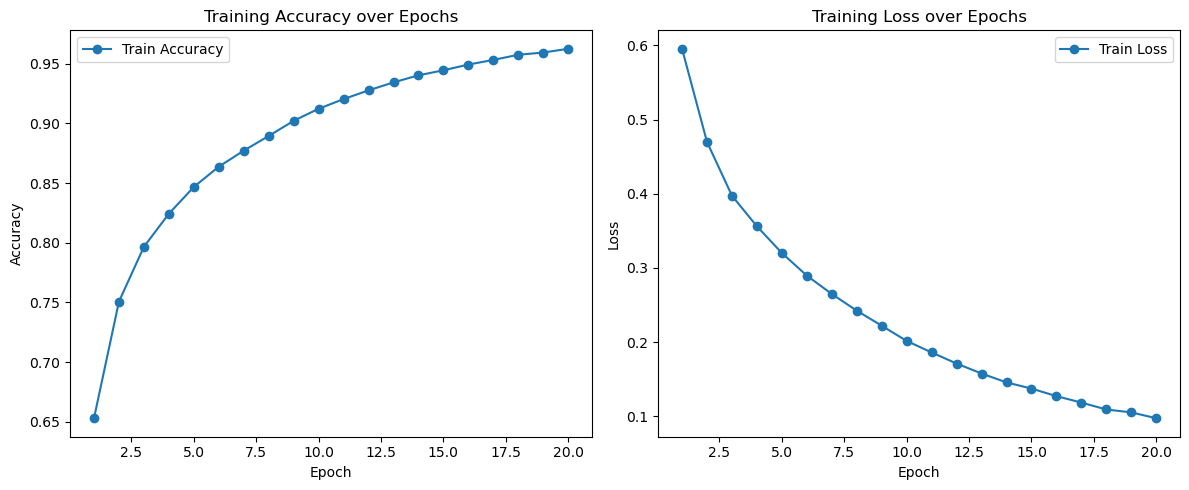

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))


# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Train Accuracy', marker='o')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Train Loss', marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


+ **Loading - Performance Evaluation:**

In [55]:
# Load the saved model
model = load_model('my_model.h5')

In [188]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict probabilities on test set
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1) using threshold 0.5
y_pred_labels = (y_pred_probs > 0.5).astype(int).flatten()

640/640 [==============================] - 10s 13ms/step - loss: 0.0826 - accuracy: 0.9672
Test Loss: 0.0826
Test Accuracy: 0.9672
640/640 [==============================] - 9s 13ms/step


In [193]:
# Cassification report

print("Classification Report:")
print(classification_report(y_test, y_pred_labels))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     10238
         1.0       0.97      0.97      0.97     10242

    accuracy                           0.97     20480
   macro avg       0.97      0.97      0.97     20480
weighted avg       0.97      0.97      0.97     20480



In [197]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_labels))


Confusion Matrix:
[[9887  351]
 [ 321 9921]]


+ **True Negative : 9887 times, the model correctly predicted calm when the person was actually calm.**


+ **False Positive : 351 times, the model incorrectly predicted stress when the person was actually calm.**


+ **True Positive : 9921 times, the model correctly predicted stress when the person was actually stressed.**


+ **False Negative : 321 times, the model incorrectly predicted calm when the person was actually stressed.**

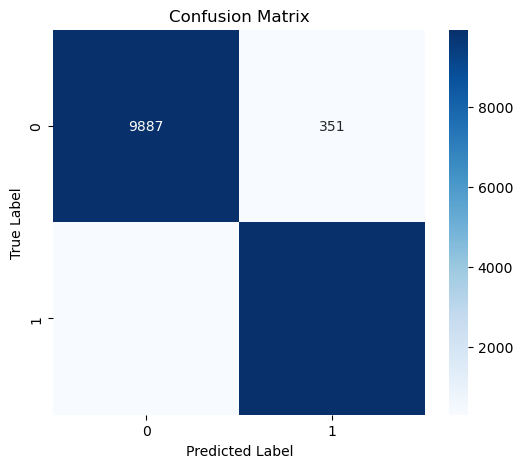

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix from predictions
cm = confusion_matrix(y_test, y_pred_labels)

# Plot it normally
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Prediction Test :

+ **Random Samples From Test Data:**

In [75]:
# Load the saved model
model = load_model('my_model.h5')

# Number of examples to show for each class
num_samples_to_show = 10

# Keep track of how many examples shown per class
shown_calm = 0
shown_stress = 0

for i in range(len(X_test)):
    sample = X_test[i:i+1]  # shape (1, timesteps, 1)
    pred_prob = model.predict(sample)[0][0]
    pred_label = 1 if pred_prob > 0.5 else 0
    true_label = int(y_test[i])

    if true_label == 0 and shown_calm < num_samples_to_show:
        print(f"Sample {i} - True: Calm, Predicted: {'Stress' if pred_label else 'Calm'} "
              f"(Prob: {pred_prob:.4f})")
        shown_calm += 1

    elif true_label == 1 and shown_stress < num_samples_to_show:
        print(f"Sample {i} - True: Stress, Predicted: {'Stress' if pred_label else 'Calm'} "
              f"(Prob: {pred_prob:.4f})")
        shown_stress += 1

    # Stop if we have enough examples for both classes
    if shown_calm >= num_samples_to_show and shown_stress >= num_samples_to_show:
        break


1/1 [==============================] - 2s 2s/step
Sample 0 - True: Stress, Predicted: Stress (Prob: 1.0000)
1/1 [==============================] - 0s 48ms/step
Sample 1 - True: Calm, Predicted: Calm (Prob: 0.0049)
1/1 [==============================] - 0s 58ms/step
Sample 2 - True: Calm, Predicted: Calm (Prob: 0.0056)
1/1 [==============================] - 0s 50ms/step
Sample 3 - True: Calm, Predicted: Calm (Prob: 0.0325)
1/1 [==============================] - 0s 47ms/step
Sample 4 - True: Stress, Predicted: Stress (Prob: 0.9869)
1/1 [==============================] - 0s 34ms/step
Sample 5 - True: Calm, Predicted: Calm (Prob: 0.0012)
1/1 [==============================] - 0s 53ms/step
Sample 6 - True: Calm, Predicted: Calm (Prob: 0.0000)
1/1 [==============================] - 0s 77ms/step
Sample 7 - True: Calm, Predicted: Calm (Prob: 0.0178)
1/1 [==============================] - 0s 97ms/step
Sample 8 - True: Stress, Predicted: Stress (Prob: 1.0000)
1/1 [==============================]

+ **Corrupted_EEG File Arithmetic:**

In [76]:
# Load the saved model
model = load_model('my_model.h5')

# Prepare the new input data
file = './Corrupted_EEG.mat'
new_data = scipy.io.loadmat(file)

new_data = new_data['Data']
if new_data.shape != (32, 3200):
    new_data = new_data.reshape(32, 3200)  # reshape the new data to have shape (num_samples, num_features)

# Apply preprocessing steps to the new data
new_data = apply_preprocessing(new_data)

# Scale the new data using the same scaler used for training
new_data = scaler.transform(new_data)

num_samples = new_data.shape[0]
num_features = new_data.shape[1]

#new_data = new_data.reshape((num_samples, num_features, 1))  # reshape back to original shape (num_samples, num_features, 1) for input to the model

# Make predictions on the new data
y_pred = model.predict(new_data)

# Convert the predicted probabilities to class labels
y_pred_labels = (y_pred > 0.5).astype('int32')

# Print whether the input graph has high or low stress
if y_pred_labels[0] == 0:
    print('The input graph has low stress.')
else:
    print('The input graph has high stress.')


1/1 [==============================] - 2s 2s/step
The input graph has high stress.


+ **Relaxation_EEG File :**

In [77]:
# Load the saved model
model = load_model('my_model.h5')

# === Suppress only non-TensorFlow warnings ===
warnings.filterwarnings("ignore")         # Suppress Python/Numpy warnings
mne.set_log_level('ERROR')                # Suppress MNE info logs

# === Step 1: Load the EDF file ===
edf_file = './S001E01.edf'
raw = mne.io.read_raw_edf(edf_file, preload=True)
raw.pick_types(eeg=True)  # Keep only EEG channels

# === Step 2: Extract EEG data ===
data, _ = raw[:]

# === Step 3: Pad to 32 channels if needed ===
desired_channels = 32
actual_channels, num_samples = data.shape

if actual_channels < desired_channels:
    padded_data = np.zeros((desired_channels, num_samples))
    padded_data[:actual_channels, :] = data
    data = padded_data

# === Step 4: Trim or pad to 3200 time points ===
target_length = 3200
if num_samples > target_length:
    data = data[:, :target_length]
elif num_samples < target_length:
    data = np.pad(data, ((0, 0), (0, target_length - num_samples)), mode='constant')

# === Step 5: Apply preprocessing ===
data = apply_preprocessing(data)

# === Step 6: Flatten to 1D sample for model input ===
data = data.reshape(1, -1)

# === Step 7: Scale using the trained scaler ===
data = scaler.transform(data)


# === Step 8: Predict ===
y_pred = model.predict(data)  # Show progress bar
y_pred_label = (y_pred > 0.5).astype('int32')

# === Step 9: Output result ===
print("The input graph has", "high stress." if y_pred_label[0] else "low stress.")

1/1 [==============================] - 2s 2s/step
The input graph has low stress.
